In [19]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [20]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
df = pd.read_csv(io.BytesIO(requests.get(URL).content), sep=",", encoding="unicode_escape")

In [21]:
data = df[["Rented Bike Count", "Rainfall(mm)", "Temperature(°C)"]].to_numpy().astype(np.float64)
x = np.hstack((data[:, 1:], data[:, 1:] @ np.array([3, 2]).reshape(-1, 1)))
y = data[:, 0]
desmat = np.hstack((x, np.ones((x.shape[0], 1))))

In [22]:
desmat_indep = desmat[:, :-2]
desmat_indep = np.hstack((desmat_indep, np.ones((desmat_indep.shape[0], 1))))

In [23]:
def get_model_fit_fro(desmat: np.ndarray, y: np.ndarray, gamma: float):
    shifted = desmat.T @ desmat + gamma * np.linalg.norm(desmat)**2 * np.eye(desmat.shape[1])
    beta = np.linalg.inv(shifted) @ desmat.T @ y
    return np.corrcoef(y, desmat @ beta)[0, 1]**2

In [24]:
def get_model_fit_red(desmat: np.ndarray, y: np.ndarray, gamma: float):
    evals, _ = np.linalg.eig(desmat.T @ desmat)
    shifted = desmat.T @ desmat + gamma * np.mean(evals) * np.eye(desmat.shape[1])
    beta = np.linalg.inv(shifted) @ desmat.T @ y
    return np.corrcoef(y, desmat @ beta)[0, 1]**2

In [25]:
gammas = np.linspace(0.0, 0.2, 50, endpoint=True)

In [26]:
dep_fro = np.zeros_like(gammas)
indep_fro = np.zeros_like(gammas)
for i, g in enumerate(gammas):
    dep_fro[i] = get_model_fit_fro(desmat, y, g)
    indep_fro[i] = get_model_fit_fro(desmat_indep, y, g)

In [27]:
dep_red = np.zeros_like(gammas)
indep_red = np.zeros_like(gammas)
for i, g in enumerate(gammas):
    dep_red[i] = get_model_fit_red(desmat, y, g)
    indep_red[i] = get_model_fit_red(desmat_indep, y, g)

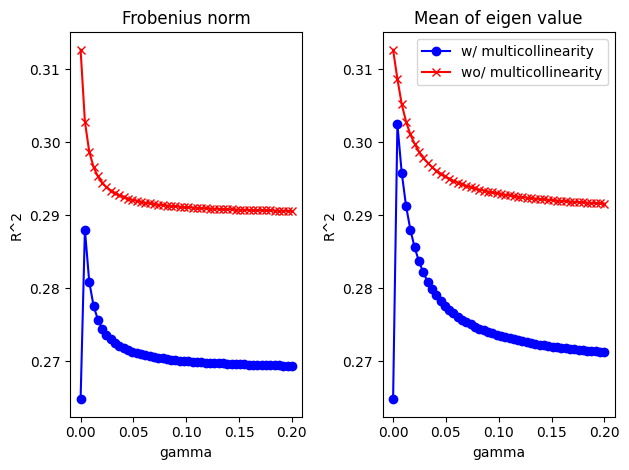

In [28]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title("Frobenius norm")
ax[0].set_xlabel("gamma")
ax[0].set_ylabel("R^2")
ax[0].plot(gammas, dep_fro, "bo-", label="w/ multicollinearity")
ax[0].plot(gammas, indep_fro, "rx-", label="wo/ multicollinearity")
ax[1].set_title("Mean of eigen value")
ax[1].set_xlabel("gamma")
ax[1].set_ylabel("R^2")
ax[1].plot(gammas, dep_red, "bo-", label="w/ multicollinearity")
ax[1].plot(gammas, indep_red, "rx-", label="wo/ multicollinearity")
fig.tight_layout()
plt.legend()
plt.show()